In [64]:
import numpy as np
from numba import njit


In [65]:
@njit(parallel=True, fastmath=True)
def next_day(array: np.array):
    mask = np.where(array == 0)
    array = array - 1
    array[mask] = 6
    # print(mask, array)
    for _ in range(len(mask[0])):
        array = np.append(array, 8)
    return array


## Test


In [66]:
arr = np.array([3, 4, 3, 1, 2], dtype=int)
for day in range(80):
    arr = next_day(arr)
    # print(day + 1, arr)
len(arr)


5934

In [67]:
with open("input") as f:
    fish_data = np.array(f.readline().split(","), dtype="int")
print(fish_data)


[3 4 1 1 5 1 3 1 1 3 5 1 1 5 3 2 4 2 2 2 1 1 1 1 5 1 1 1 1 1 3 1 1 5 4 1 1
 1 4 1 1 1 1 2 3 2 5 1 5 1 2 1 1 1 4 1 1 1 1 3 1 1 3 1 1 1 1 1 1 2 3 4 2 1
 3 1 1 2 1 1 2 1 5 2 1 1 1 1 1 1 4 1 1 1 1 5 1 4 1 1 1 3 3 1 3 1 3 1 4 1 1
 1 1 1 4 5 1 1 3 2 2 5 5 4 3 1 2 1 1 1 4 1 3 4 1 1 1 1 2 1 1 3 2 1 1 1 1 1
 4 1 1 1 4 4 5 2 1 1 1 1 1 2 4 2 1 1 1 2 1 1 2 1 5 1 5 2 5 5 1 1 3 1 4 1 1
 1 1 1 1 1 4 1 1 4 1 1 1 1 1 2 1 2 1 1 1 5 1 1 3 5 1 1 5 5 3 5 3 4 1 1 1 3
 1 1 3 1 1 1 1 1 1 5 1 3 1 5 1 1 4 1 3 1 1 1 2 1 1 1 2 1 5 1 1 1 1 4 1 3 2
 3 4 1 3 5 3 4 1 4 4 4 1 3 2 4 1 4 1 1 2 1 3 1 5 5 1 5 1 1 1 5 2 1 2 3 1 4
 3 3 4 3]


In [68]:
data = []
arr = fish_data.copy()
for day in range(80):
    # arr = arr - 1
    arr = next_day(arr)
    data.append({"day": day + 1, "size": len(arr)})
    if day % 10 == 0:
        print(day + 1, len(arr))

len(arr)


1 300
11 1008
21 2242
31 4940
41 12760
51 29560
61 71386
71 172324


379414

## Part 2


In [69]:
import pandas as pd


<AxesSubplot:xlabel='day'>

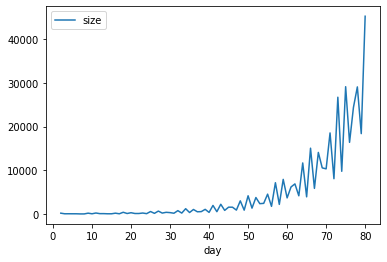

In [70]:
df = pd.DataFrame(data).set_index("day")
df


In [71]:
ax = df.plot()
# ax.axhline(26984457539)


1705008653296

In [ ]:
df.diff().plot()


In [72]:
from collections import Counter

life_times = dict(Counter(fish_data.copy()))
for day in range(256):
    ## shift all values down
    life_times = { l: (0 if life_times.get(l+1) is None else life_times[l+1]) for l in range(-1, 8)}
    life_times[8] = life_times[-1] ## life times at ix -1 will have all zeros 
    life_times[6] += life_times[-1] ## the zeros need to be added the sixes 
    life_times[-1] = 0 ## reset 0s

sum(life_times.values())

1705008653296